<a href="https://colab.research.google.com/github/devclo/Intro-To-Artificial-Intelligence/blob/UAV-Detection-and-Tracking/UAV_Detection_and_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAV Detection and Tracking
Multi-Object Tracking (MOT) is a core visual ability that humans poses to perform kinetic tasks and coordinate other tasks. The AI community has recognized the importance of MOT via a series of competitions.

In this assignment, the object class is drone and the ability to track this object will be demonstrated using Kalman Filters. The assignment will give you the opportunity to apply probabilistic reasoning in the physical security application space.

#Setup your development environment and store the test videos locally
> Downloading Drone Videos locally



In [ ]:
!apt update -y
!apt upgrade -y
!pip install -U yt-dlp
!pip install ffmpeg
!pip install srt
!pip install -U openai-whisper
!pip install setuptools-rust
!pip install moviepy


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe

In [ ]:
import os
import whisper
import yt_dlp
from moviepy.editor import VideoFileClip

def sanitize_filename(filename):
    # Replace special characters in filename with underscore
    return "".join([c if c.isalnum() or c in " .-_" else "_" for c in filename])

def download_video(video_url, output_path='downloads'):
    # Create the output directory if it doesn't exist
    if not os.path.isdir(output_path):
        os.makedirs(output_path)

    ydl_opts = {
        'format': 'bestvideo+bestaudio/best',
        'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
        'merge_output_format': 'mp4',  # Ensure the final file is in mp4 format
    }

    # Use yt_dlp to download the video
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(video_url, download=True)
        # Get the filename that yt_dlp has actually saved the file as
        filename = ydl.prepare_filename(info_dict)
        # Check if the file exists using the actual filename
        if not os.path.exists(filename):
            # Try replacing special characters if the file is not found
            filename = sanitize_filename(filename)
            if not os.path.exists(filename):
                raise FileNotFoundError(f"The video file {filename} was not found. Download may have failed.")
        return filename

def extract_audio(video_path):
    # Extract the audio from the video
    video_clip = VideoFileClip(video_path)
    audio_path = video_path + ".wav"
    video_clip.audio.write_audiofile(audio_path)
    return audio_path

def transcribe_audio(whisper_model, audio_path):
    # Transcribe the audio file using Whisper
    result = whisper_model.transcribe(audio_path)
    return result["text"]

# Function to call the video download and transcription
def transcribe_video_from_url(video_url):
    # Download the video and get the filename
    video_path = download_video(video_url)
    print(f"Downloaded video path: {video_path}")

    # Extract audio from the video
    audio_path = extract_audio(video_path)
    print(f"Extracted audio path: {audio_path}")

    # Load the Whisper model
    model = whisper.load_model("base")

    # Transcribe the audio and get the transcription text
    transcription = transcribe_audio(model, audio_path)
    print(f"Transcription: {transcription}")

    # Clean up the audio file
    os.remove(audio_path)






> Downloading the first Drone Video



In [ ]:
if __name__ == "__main__":
    # Replace this with the actual URL input from the user
    input_url = 'https://youtu.be/DhmZ6W1UAv4'
    # Call the function with the URL
    transcribe_video_from_url(input_url)

[youtube] Extracting URL: https://youtu.be/DhmZ6W1UAv4
[youtube] DhmZ6W1UAv4: Downloading webpage
[youtube] DhmZ6W1UAv4: Downloading ios player API JSON
[youtube] DhmZ6W1UAv4: Downloading android player API JSON
[youtube] DhmZ6W1UAv4: Downloading m3u8 information
[info] DhmZ6W1UAv4: Downloading 1 format(s): 137+251
[download] Destination: downloads/Drone Tracking 1.f137.mp4
[download] 100% of   10.89MiB in 00:00:00 at 16.33MiB/s  
[download] Destination: downloads/Drone Tracking 1.f251.webm
[download] 100% of    2.42MiB in 00:00:00 at 23.41MiB/s  
[Merger] Merging formats into "downloads/Drone Tracking 1.mp4"
Deleting original file downloads/Drone Tracking 1.f137.mp4 (pass -k to keep)
Deleting original file downloads/Drone Tracking 1.f251.webm (pass -k to keep)
Downloaded video path: downloads/Drone Tracking 1.mp4
MoviePy - Writing audio in downloads/Drone Tracking 1.mp4.wav


MoviePy - Done.
Extracted audio path: downloads/Drone Tracking 1.mp4.wav


100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 89.8MiB/s]


Transcription:  start yeah now Jesse can you whistle really loudly I wait wait wait after the heat and zone throw it on but this one this one going yes yes so now how much time to whistle okay this doesn't go really fast that is there must be wind yeah okay about the other directions this is a racing okay this was I'm I'm going full throttle there but it doesn't it doesn't really go I I'm gonna move up. You see, I'm moving just a little bit, but I can move it over there. Uh-huh. Can we do like... I think we can take this city full of hand-hand. We have to go there. It's okay. It's not recording. It's not recording, but it's just barely now in the scene. This is how it goes. Ah, okay. Well, anyway, I'll do what I can. It's fun. Hey, it's in our center. Sure, I understand. I just... A lot of... I'm working with... That's right one. A little bit higher. Okay. Uh... Can I land now? Yeah. Uh, you can just hit this one for the maximum, or the maximum, or the maximum. I don't know. That's the

> Downloading the second Drone Video

In [ ]:
if __name__ == "__main__":
    # Replace this with the actual URL input from the user
    input_url = 'https://youtu.be/YrydHPwRelI'
    # Call the function with the URL
    transcribe_video_from_url(input_url)

[youtube] Extracting URL: https://youtu.be/YrydHPwRelI
[youtube] YrydHPwRelI: Downloading webpage
[youtube] YrydHPwRelI: Downloading ios player API JSON
[youtube] YrydHPwRelI: Downloading android player API JSON
[youtube] YrydHPwRelI: Downloading m3u8 information
[info] YrydHPwRelI: Downloading 1 format(s): 137+251
[download] Destination: downloads/Drone tracking 2.f137.mp4
[download] 100% of   37.23MiB in 00:00:03 at 10.50MiB/s  
[download] Destination: downloads/Drone tracking 2.f251.webm
[download] 100% of    7.47MiB in 00:00:00 at 14.13MiB/s  
[Merger] Merging formats into "downloads/Drone tracking 2.mp4"
Deleting original file downloads/Drone tracking 2.f137.mp4 (pass -k to keep)
Deleting original file downloads/Drone tracking 2.f251.webm (pass -k to keep)
Downloaded video path: downloads/Drone tracking 2.mp4
MoviePy - Writing audio in downloads/Drone tracking 2.mp4.wav


MoviePy - Done.
Extracted audio path: downloads/Drone tracking 2.mp4.wav
Transcription:  Hattis Uninstrumental 1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 1,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 1,2,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 1,2,3,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4

In [ ]:
import os

# Specify the current file path and the new file path
current_file_path = "/content/downloads/Drone Tracking 1.mp4"
new_file_path = "/content/downloads/drone-video-1.mp4"

# Rename the file
os.rename(current_file_path, new_file_path)

print(f"File renamed to: {new_file_path}")

File renamed to: /content/downloads/drone-video-1.mp4


In [ ]:
import os

# Specify the current file path and the new file path
current_file_path = "/content/downloads/Drone tracking 2.mp4"
new_file_path = "/content/downloads/drone-video-2.mp4"

# Rename the file
os.rename(current_file_path, new_file_path)

print(f"File renamed to: {new_file_path}")

File renamed to: /content/downloads/drone-video-2.mp4


In [ ]:
drone_video_1 = '/content/downloads/drone-video-1.mp4'
drone_video_2 = '/content/downloads/drone-video-2.mp4'

#Task 1 - Setup your development environment and store the test videos locally (10 points)

Task 1: Drone Object Detection (40 points)
You need to research can use any dataset that can be used to detect the class drone such as the drones used for the test videos. Please be careful to distinguish between the datasets that detect objects from drones to datasets that detect the drones. Your object detector must use a deep learning model but you can use an existing object detector model architecture.

Split the videos into frames and use each frame to present the drone detections you got. Store all images that you had detections in a folder called detections. Write your code in such a way that a number of videos can be processed from a directory and not just these two.

In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/gdrive


In [ ]:
### 2. Define root directory ###

ROOT_DIR = '/content/drive/MyDrive/Inroduction to Aritifical Intelligence/Programming Assignments/Colab Notebooks/UAV/Datasets/UAV Drones/drone_dataset'


In [ ]:
### 3. Install Ultralytics ###

!pip install ultralytics
!pip install torch
!pip install opencv-python

In [ ]:
### 4. Train model ###
from ultralytics import YOLO
import torch
import os

# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

DATASETS_DIR = '/content/gdrive/MyDrive/Inroduction to Aritifical Intelligence/Programming Assignments/Colab Notebooks/UAV/Datasets/UAV Drones/drone_dataset/dataset'

# Use the model
results = model.train(data=os.path.join(DATASETS_DIR, "data.yaml"), epochs=30)  # train the model


Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Inroduction to Aritifical Intelligence/Programming Assignments/Colab Notebooks/UAV/Datasets/UAV Drones/drone_dataset/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_wi

100%|██████████| 755k/755k [00:00<00:00, 42.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))

  fusedconv.bias.copy_(torch.mm(w_bn, b_conv.reshape(-1, 1)).reshape(-1) + b_bn)



AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/Inroduction to Aritifical Intelligence/Programming Assignments/Colab Notebooks/UAV/Datasets/UAV Drones/drone_dataset/dataset/train/labels.cache... 1016 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1016/1016 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/Inroduction to Aritifical Intelligence/Programming Assignments/Colab Notebooks/UAV/Datasets/UAV Drones/drone_dataset/dataset/valid/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       1/30      2.32G      1.429      2.072      1.592         24        640: 100%|██████████| 64/64 [00:17<00:00,  3.75it/s]
                 Class     Images  Instances     

                   all        294        322      0.552      0.481      0.538      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       2/30       2.3G      1.443      1.712      1.591         19        640: 100%|██████████| 64/64 [00:07<00:00,  8.03it/s]
                 Class     Images  Instances     

                   all        294        322      0.615      0.615      0.675      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       3/30      2.29G      1.498      1.608      1.642         23        640: 100%|██████████| 64/64 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances     

                   all        294        322      0.521      0.388      0.366      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       4/30      2.29G      1.516      1.474      1.628         22        640: 100%|██████████| 64/64 [00:08<00:00,  7.73it/s]
                 Class     Images  Instances     

                   all        294        322      0.685      0.696      0.683      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       5/30      2.29G      1.479      1.367      1.596         20        640: 100%|██████████| 64/64 [00:07<00:00,  8.82it/s]
                 Class     Images  Instances     

                   all        294        322      0.697      0.686      0.719      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       6/30      2.29G      1.457      1.318       1.59         17        640: 100%|██████████| 64/64 [00:07<00:00,  8.13it/s]
                 Class     Images  Instances     

                   all        294        322      0.723      0.665      0.721      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       7/30      2.29G      1.422       1.21      1.547         24        640: 100%|██████████| 64/64 [00:07<00:00,  8.69it/s]
                 Class     Images  Instances     

                   all        294        322      0.762      0.785      0.797      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       8/30      2.29G       1.41      1.175      1.536         22        640: 100%|██████████| 64/64 [00:07<00:00,  8.49it/s]
                 Class     Images  Instances     

                   all        294        322      0.765      0.826      0.853      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

       9/30      2.29G      1.333      1.107      1.498         27        640: 100%|██████████| 64/64 [00:07<00:00,  8.21it/s]
                 Class     Images  Instances     

                   all        294        322      0.878      0.776      0.871      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      10/30      2.29G      1.309      1.078      1.466         16        640: 100%|██████████| 64/64 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances     

                   all        294        322      0.914      0.839      0.926       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      11/30      2.29G      1.335      1.066      1.483         18        640: 100%|██████████| 64/64 [00:07<00:00,  8.62it/s]
                 Class     Images  Instances     

                   all        294        322      0.911      0.792      0.885      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      12/30      2.29G      1.291      1.028      1.448         18        640: 100%|██████████| 64/64 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances     

                   all        294        322      0.882      0.854      0.905      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      13/30      2.29G      1.269      0.988      1.449         21        640: 100%|██████████| 64/64 [00:08<00:00,  7.58it/s]
                 Class     Images  Instances     

                   all        294        322      0.848      0.885      0.915      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      14/30      2.29G      1.249     0.9744      1.429         22        640: 100%|██████████| 64/64 [00:07<00:00,  8.52it/s]
                 Class     Images  Instances     

                   all        294        322      0.931      0.837      0.932      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      15/30      2.29G      1.225     0.9129      1.403         25        640: 100%|██████████| 64/64 [00:07<00:00,  8.08it/s]
                 Class     Images  Instances     

                   all        294        322      0.905      0.889      0.924      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      16/30      2.29G      1.216     0.8891      1.383         21        640: 100%|██████████| 64/64 [00:07<00:00,  8.44it/s]
                 Class     Images  Instances     

                   all        294        322      0.935      0.907      0.955      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      17/30      2.29G      1.194       0.87      1.378         24        640: 100%|██████████| 64/64 [00:07<00:00,  8.53it/s]
                 Class     Images  Instances     

                   all        294        322      0.939      0.904      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      18/30      2.29G      1.179     0.8691      1.373         30        640: 100%|██████████| 64/64 [00:07<00:00,  8.80it/s]
                 Class     Images  Instances     

                   all        294        322      0.946      0.919      0.958      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      19/30      2.29G      1.166     0.8264       1.35         26        640: 100%|██████████| 64/64 [00:07<00:00,  8.30it/s]
                 Class     Images  Instances     

                   all        294        322       0.95      0.898      0.963      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      20/30      2.29G      1.143     0.8183      1.344         26        640: 100%|██████████| 64/64 [00:07<00:00,  8.89it/s]
                 Class     Images  Instances     

                   all        294        322       0.94      0.932      0.972      0.655


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      21/30      2.29G      1.083     0.7452      1.372          8        640: 100%|██████████| 64/64 [00:09<00:00,  6.74it/s]
                 Class     Images  Instances     

                   all        294        322      0.936      0.919      0.967      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      22/30      2.29G      1.028     0.6678      1.336          8        640: 100%|██████████| 64/64 [00:07<00:00,  8.98it/s]
                 Class     Images  Instances     

                   all        294        322      0.956      0.913      0.962      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      23/30      2.29G     0.9977     0.6048      1.302          8        640: 100%|██████████| 64/64 [00:07<00:00,  8.48it/s]
                 Class     Images  Instances     

                   all        294        322       0.95      0.932      0.974      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      24/30      2.29G     0.9873     0.5831       1.31          8        640: 100%|██████████| 64/64 [00:06<00:00,  9.14it/s]
                 Class     Images  Instances     

                   all        294        322      0.953      0.946      0.974      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      25/30      2.29G     0.9656     0.5687      1.287          8        640: 100%|██████████| 64/64 [00:07<00:00,  8.44it/s]
                 Class     Images  Instances     

                   all        294        322      0.964      0.926      0.976      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      26/30      2.29G     0.9423     0.5538      1.264          8        640: 100%|██████████| 64/64 [00:06<00:00,  9.36it/s]
                 Class     Images  Instances     

                   all        294        322      0.953      0.942      0.974       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      27/30      2.29G     0.9324     0.5336      1.271          9        640: 100%|██████████| 64/64 [00:07<00:00,  8.42it/s]
                 Class     Images  Instances     

                   all        294        322      0.944      0.916      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      28/30      2.29G     0.8968     0.5088      1.237          8        640: 100%|██████████| 64/64 [00:07<00:00,  8.90it/s]
                 Class     Images  Instances     

                   all        294        322      0.961      0.918      0.963      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      29/30      2.29G     0.8838     0.4916      1.232          9        640: 100%|██████████| 64/64 [00:07<00:00,  8.45it/s]
                 Class     Images  Instances     

                   all        294        322      0.961      0.925      0.967      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:159: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:156.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))

      30/30      2.29G     0.8627     0.4829      1.217         10        640: 100%|██████████| 64/64 [00:07<00:00,  9.10it/s]
                 Class     Images  Instances     

                   all        294        322      0.969      0.922      0.964      0.685



30 epochs completed in 0.091 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))

  fusedconv.bias.copy_(torch.mm(w_bn, b_conv.reshape(-1, 1)).reshape(-1) + b_bn)



Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]


                   all        294        322      0.969      0.922      0.964      0.685
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


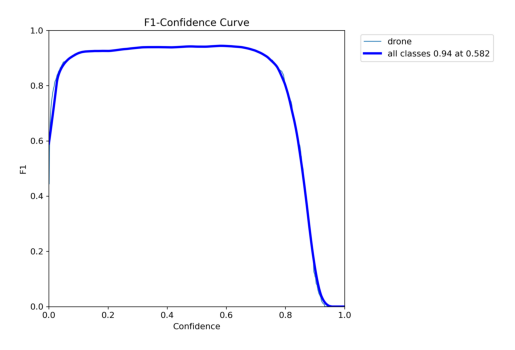

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/runs/detect/train2/F1_curve.png'

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off') # to turn off axis
plt.show()


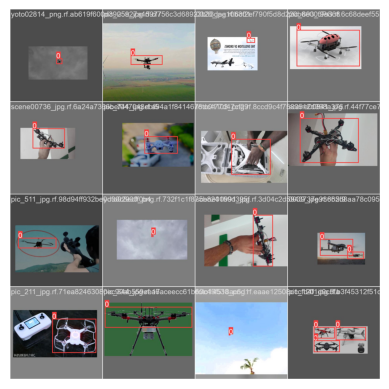

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/runs/detect/train2/train_batch1282.jpg'

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off') # to turn off axis
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/runs/detect/train2/train_batch1282.jpg'

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off') # to turn off axis

plt.show()

Saving a JPG for every dectecton.

In [30]:
import os
import cv2
from ultralytics import YOLO

def process_video(video_path, model, threshold=0.5, detections_folder='/content/detections'):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if not ret:
        print(f"Failed to read video: {video_path}")
        return

    H, W, _ = frame.shape

    frame_count = 0
    while ret:
        results = model(frame)[0]

        drone_detected = False
        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result

            if score > threshold:
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
                drone_detected = True

        if drone_detected:
            save_path = os.path.join(detections_folder, f"{os.path.basename(video_path)}_frame{frame_count}.jpg")
            cv2.imwrite(save_path, frame)

        ret, frame = cap.read()
        frame_count += 1

    cap.release()

def main():
    VIDEOS_DIR = '/content/downloads'
    model_path = './runs/detect/train2/weights/best.pt'
    model = YOLO(model_path)  # load a custom model

    if not os.path.exists('/content/detections'):
        os.makedirs('/content/detections')

    for video_file in os.listdir(VIDEOS_DIR):
        if video_file.endswith('.mp4'):  # Check if it's a video file
            video_path = os.path.join(VIDEOS_DIR, video_file)
            process_video(video_path, model)

if __name__ == '__main__':
    main()


  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))

  fusedconv.bias.copy_(torch.mm(w_bn, b_conv.reshape(-1, 1)).reshape(-1) + b_bn)



Streaming output truncated to the last 5000 lines.
0: 384x640 1 drone, 11.0ms
Speed: 2.9ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 9.8ms
Speed: 3.0ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.2ms
Speed: 2.3ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 2.0ms post

In [33]:
import os

from ultralytics import YOLO
import cv2

video_detections = '/content/detections'

VIDEOS_DIR = os.path.join('/content/downloads')

video_path = os.path.join(VIDEOS_DIR, 'drone-video-1.mp4')
video_path_out = '{}_out.mp4'.format(video_detections)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))

  fusedconv.bias.copy_(torch.mm(w_bn, b_conv.reshape(-1, 1)).reshape(-1) + b_bn)




0: 384x640 1 drone, 11.9ms
Speed: 3.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.4ms
Speed: 2.7ms preprocess, 11.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 12.6ms
Speed: 2.4ms preprocess, 12.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 12.6ms
Speed: 2.3ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0

KeyboardInterrupt: ignored

#Task 2 - Kalman Filter (50 points)

Use the `filterpy`` library to implement a Kalman filter that will track the drone in the video. You will need to use the detections from the previous task to initialize the Kalman filter.

You need to deliver a number of short videos with each video containing only the frames where the drone is present in the test video and its 2D trajectory shown as a line that connects the pixels that the tracker indicated. You can use the ffmpeg command line tool and OpenCV to superpose the bounding box of the drone on the video as well as plot its trajectory.

In [43]:
import os
import cv2
from ultralytics import YOLO
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

def create_kalman_filter(dt=1, r_var=0.1):
    kf = KalmanFilter(dim_x=4, dim_z=2)

    # Transition matrix
    kf.F = np.array([[1, dt, 0,  0],
                     [0,  1, 0,  0],
                     [0,  0, 1, dt],
                     [0,  0, 0,  1]])

    # Measurement function
    kf.H = np.array([[1, 0, 0, 0],
                     [0, 0, 1, 0]])

    # Measurement uncertainty
    kf.R = np.array([[r_var, 0],
                     [0, r_var]])

    # Initial state
    kf.x = np.array([0, 0, 0, 0])

    # State Covariance
    kf.P *= 1000

    # Process Uncertainty
    kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)

    return kf

def process_video(video_path, model, threshold=0.5, detections_folder='/content/detections'):
    video_folder = os.path.splitext(os.path.basename(video_path))[0]
    video_detections_folder = os.path.join(detections_folder, video_folder)

    if not os.path.exists(video_detections_folder):
        os.makedirs(video_detections_folder)

    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if not ret:
        print(f"Failed to read video: {video_path}")
        return

    frame_count = 0
    while ret:
        results = model(frame)[0]

        drone_detected = False
        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result

            if score > threshold:
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
                drone_detected = True

        if drone_detected:
            save_path = os.path.join(video_detections_folder, f"{os.path.basename(video_path)}_frame{frame_count}.jpg")
            cv2.imwrite(save_path, frame)

        ret, frame = cap.read()
        frame_count += 1

    cap.release()

def main():
    VIDEOS_DIR = '/content/downloads'
    model_path = './runs/detect/train2/weights/best.pt'
    model = YOLO(model_path)  # load a custom model

    if not os.path.exists('/content/detections'):
        os.makedirs('/content/detections')

    for video_file in os.listdir(VIDEOS_DIR):
        if video_file.endswith('.mp4'):  # Check if it's a video file
            video_path = os.path.join(VIDEOS_DIR, video_file)
            process_video(video_path, model)

if __name__ == '__main__':
    main()

  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))

  fusedconv.bias.copy_(torch.mm(w_bn, b_conv.reshape(-1, 1)).reshape(-1) + b_bn)



Streaming output truncated to the last 5000 lines.
0: 384x640 1 drone, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.1ms
Speed: 2.5ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.3ms
Speed: 2.5ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.6ms
Speed: 3.0ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 11.7ms
Speed: 2.3ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 13.0ms
Speed: 2.5ms preprocess, 13.0ms inference, 2.3m